In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading CSV

In [6]:
PHQ9Pre = pd.DataFrame()
PHQ9Pre = pd.read_csv('../dataset/PHQ9/PHQ9Pre.csv')
# print(PHQ9Pre)

In [7]:
ActivityData = pd.DataFrame()
ActivityData = pd.read_csv('../dataset/BasicFeatures/activityCounts.csv')
# print(ActivityData)

In [8]:
AudioData = pd.DataFrame()
AudioData = pd.read_csv('../dataset/BasicFeatures/audioCounts.csv')
# print(AudioData)

In [9]:
ConversationData = pd.DataFrame()
ConversationData = pd.read_csv('../dataset/BasicFeatures/conversationCounts.csv')
# print(ConversationData)

In [10]:
locationData = pd.DataFrame()
locationData = pd.read_csv('../dataset/BasicFeatures/locationAvgs.csv')
# print(locationData)

In [11]:
DarknessData = pd.DataFrame()
DarknessData = pd.read_csv('../dataset/BasicFeatures/darknessCounts.csv')
# print(DarknessData)

In [12]:
ChargeData = pd.DataFrame()
ChargeData = pd.read_csv('../dataset/BasicFeatures/chargeCounts.csv')
# print(ChargeData)

In [13]:
LockData = pd.DataFrame()
LockData = pd.read_csv('../dataset/BasicFeatures/lockCounts.csv')
# print(LockData)

## Merge Audio and Activity

In [14]:
AudioActivityMerged = pd.merge(AudioData, ActivityData, on=['userId', 'WeekId'])
print(AudioActivityMerged)

    userId  AudioEarlyMorning0  AudioEarlyMorning1  AudioEarlyMorning2  \
0      u00             54484.0             42088.0             18262.0   
1      u01             55375.0             76962.0             33123.0   
2      u02             57214.0             23547.0             18661.0   
3      u03             59007.0              2282.0              1353.0   
4      u04             51336.0             25755.0             25512.0   
..     ...                 ...                 ...                 ...   
426    u54             10603.0              9710.0              4781.0   
427    u56             60574.0             25537.0             28762.0   
428    u57             50390.0             65704.0             46693.0   
429    u58             39449.0             61569.0             29227.0   
430    u59            140549.0             42769.0             83108.0   

     AudioMorning0  AudioMorning1  AudioMorning2  AudioAfternoon0  \
0          60296.0         8178.0         

In [15]:
AudioActivityPHQ9 = pd.merge(AudioActivityMerged, PHQ9Pre, on='userId')
print(AudioActivityPHQ9)

    userId  AudioEarlyMorning0  AudioEarlyMorning1  AudioEarlyMorning2  \
0      u00             54484.0             42088.0             18262.0   
1      u01             55375.0             76962.0             33123.0   
2      u02             57214.0             23547.0             18661.0   
3      u03             59007.0              2282.0              1353.0   
4      u04             51336.0             25755.0             25512.0   
..     ...                 ...                 ...                 ...   
400    u53             52041.0             18883.0              2891.0   
401    u56             60574.0             25537.0             28762.0   
402    u57             50390.0             65704.0             46693.0   
403    u58             39449.0             61569.0             29227.0   
404    u59            140549.0             42769.0             83108.0   

     AudioMorning0  AudioMorning1  AudioMorning2  AudioAfternoon0  \
0          60296.0         8178.0         

In [16]:
AudioActivityPHQ9Mat = AudioActivityPHQ9.drop(columns=['userId','WeekId'])

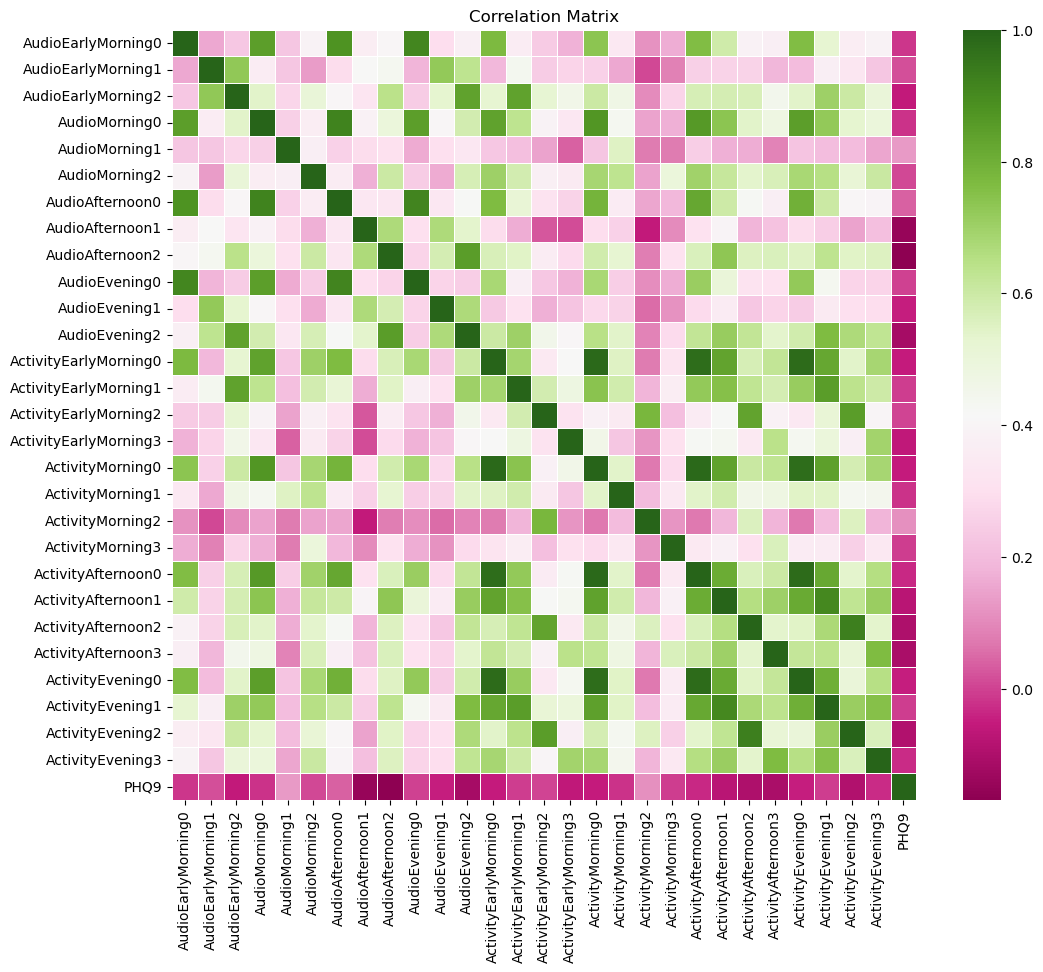

In [17]:
correlation_matrix = AudioActivityPHQ9Mat.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='PiYG', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')

plt.show()

## Merge Location Supp Data 

In [18]:
locationActAudMerged = pd.merge(locationData, AudioActivityPHQ9, on=['userId', 'WeekId'])
print(locationActAudMerged)

    userId  LocationSpeedMean  LocationSpeedVariance  LocationTotalDistance  \
0      u00       1.195322e-05           2.414929e-08             177.404113   
1      u01       5.792007e-07           1.301735e-11               0.488644   
2      u02       1.259919e-06           3.374087e-10               0.708870   
3      u05       8.065367e-07           1.547015e-10               0.429509   
4      u08       5.803770e-07           5.576467e-12               0.660531   
..     ...                ...                    ...                    ...   
251    u53       1.044557e-06           3.605388e-10               2.392383   
252    u56       6.158425e-07           1.481075e-11               3.712299   
253    u57       2.169338e-06           2.327272e-10               2.195326   
254    u58       1.632380e-06           1.815200e-10               3.590439   
255    u59       1.967528e-05           1.817343e-08              22.596905   

     LocationLocationVariance  LocationCircadianMov

In [19]:
locationActAudMergedMat = locationActAudMerged.drop(columns=['userId','WeekId'])

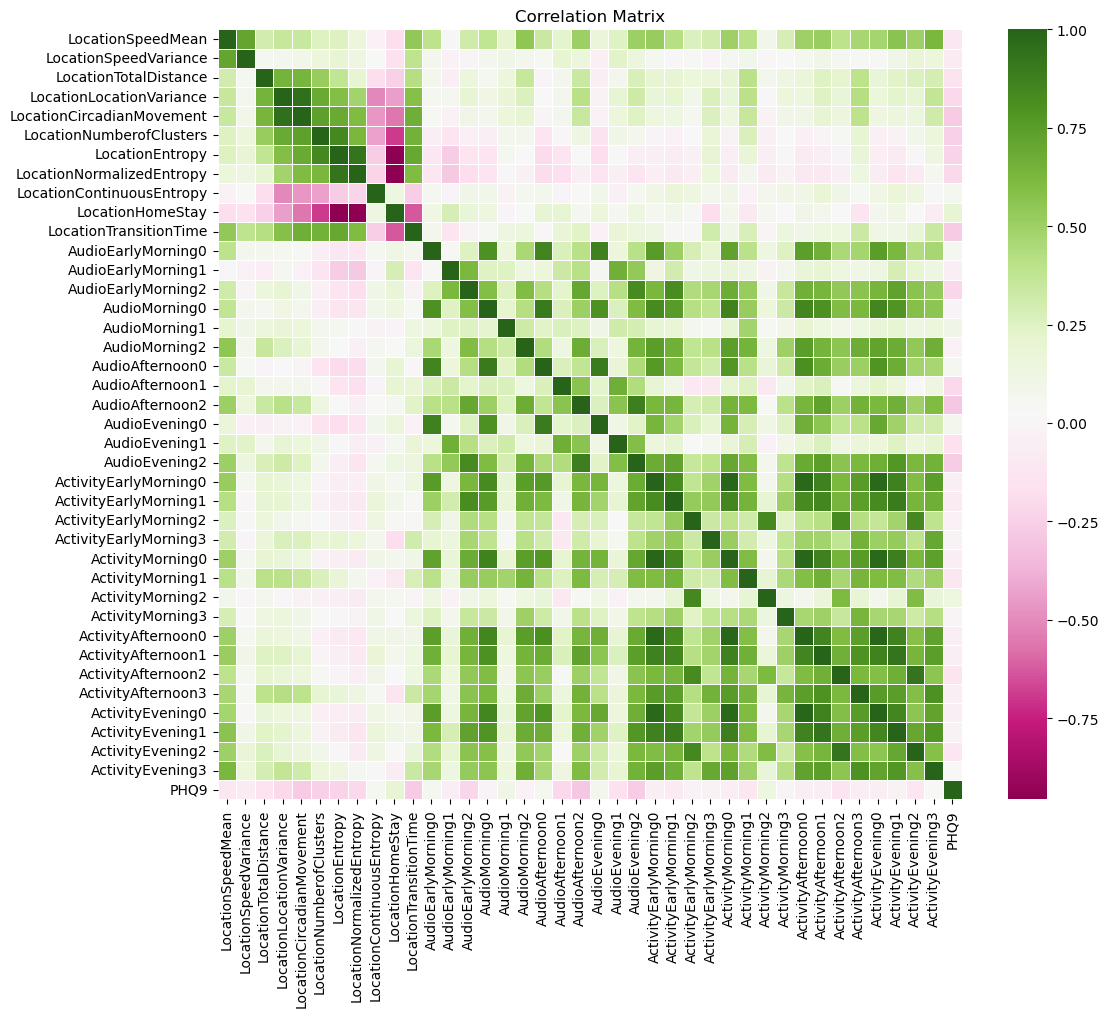

In [20]:
correlation_matrix = locationActAudMergedMat.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='PiYG', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')

plt.show()

## Merge Conversation

In [30]:
locationActAudConvoMerged = pd.merge(ConversationData,locationActAudMerged, on=['userId', 'WeekId'])
print(locationActAudConvoMerged)

    userId  ConversationEarlyMorningMean  ConversationMorningMean  \
0      u00                    481.548673               539.687500   
1      u01                    790.254630               789.560000   
2      u02                    558.244094               204.666667   
3      u05                    556.218750               307.500000   
4      u08                    666.111702               172.321429   
..     ...                           ...                      ...   
251    u53                    333.782609               348.972973   
252    u56                    640.433333               101.000000   
253    u57                    609.973958               520.735294   
254    u58                    844.518519               189.500000   
255    u59                    245.023747               143.400000   

     ConversationAfternoonMean  ConversationEveningMean  \
0                  1021.666667               764.549133   
1                  1115.842105               985.0353

In [22]:
locationActAudConvoMerged = locationActAudConvoMerged.drop(columns=['userId','WeekId'])

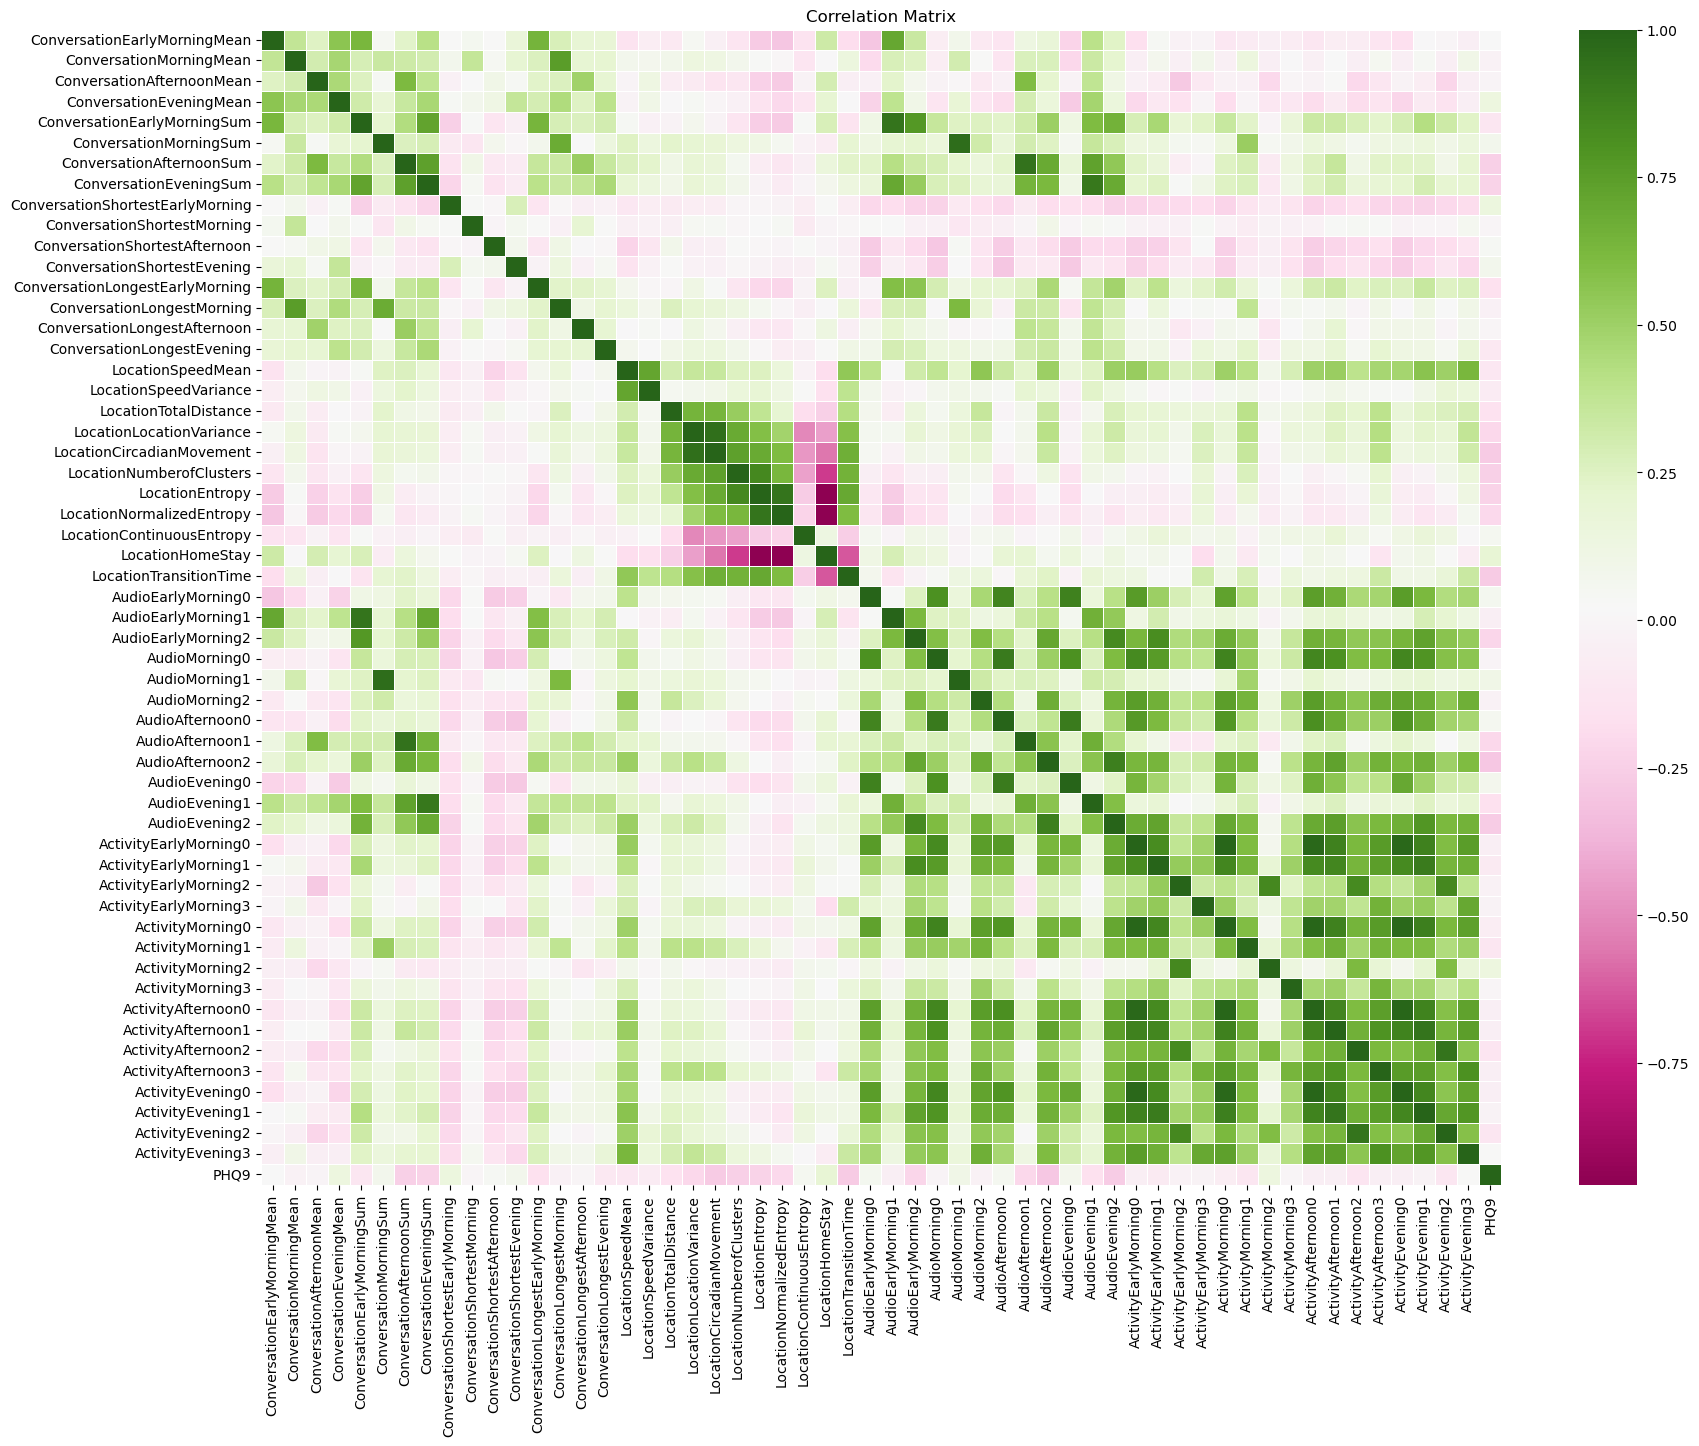

In [23]:
correlation_matrix = locationActAudConvoMerged.corr()

# plt.figure(figsize=(12, 10))
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='PiYG', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')

plt.show()

## Merge Charge, Lock & Dark Data

In [24]:
ChargeLockMerged = pd.merge(ChargeData, LockData, on=['userId', 'WeekId'])
print(ChargeLockMerged)

    userId  ChargeEarlyMorningMean  ChargeMorningMean  ChargeAfternoonMean  \
0      u00            15531.125000       14954.000000              6799.25   
1      u01            32588.200000       23984.000000              4321.00   
2      u02            25428.545455       20958.000000                 0.00   
3      u03            22247.200000           0.000000             29149.00   
4      u04            26193.583333           0.000000             10911.00   
..     ...                     ...                ...                  ...   
419    u54             4470.000000        4594.000000                 0.00   
420    u56            30771.333333           0.000000             23210.00   
421    u57            17177.000000       18101.333333              8976.25   
422    u58            26686.142857       19755.000000             10023.00   
423    u59            10043.700000       20922.857143              5695.00   

     ChargeEveningMean  ChargeEarlyMorningSum  ChargeMorningSum

In [28]:
ChargeLockDarkMerged = pd.merge(DarknessData, ChargeLockMerged, on=['userId', 'WeekId'])
print(ChargeLockDarkMerged)

    userId  DarknessEarlyMorningMean  DarknessMorningMean  \
0      u00              17921.142857         14769.500000   
1      u01              15129.500000         29170.000000   
2      u02              20911.647059         29445.000000   
3      u03              28856.000000             0.000000   
4      u04              20641.294118          5202.250000   
..     ...                       ...                  ...   
414    u54                  0.000000         15144.000000   
415    u56              34205.000000             0.000000   
416    u57              14656.416667         17738.625000   
417    u58              33182.000000             0.000000   
418    u59              10468.000000         21137.142857   

     DarknessAfternoonMean  DarknessEveningMean  DarknessEarlyMorningSum  \
0              5953.833333          7034.625000                 125448.0   
1              9228.166667          9457.166667                 181554.0   
2              5509.600000          549

In [31]:
AllMerged = pd.merge(ChargeLockDarkMerged,locationActAudConvoMerged, on=['userId', 'WeekId'])
print(AllMerged)

    userId  DarknessEarlyMorningMean  DarknessMorningMean  \
0      u00              18372.333333         15542.000000   
1      u01              14846.090909         26047.000000   
2      u02              15283.095238         24830.333333   
3      u05              20652.578947             0.000000   
4      u08              11652.900000         19603.200000   
..     ...                       ...                  ...   
247    u53                  0.000000         27599.500000   
248    u56              34205.000000             0.000000   
249    u57              14656.416667         17738.625000   
250    u58              33182.000000             0.000000   
251    u59              10468.000000         21137.142857   

     DarknessAfternoonMean  DarknessEveningMean  DarknessEarlyMorningSum  \
0              6005.769231          8243.647059                 220468.0   
1              8724.642857         13042.380952                 163307.0   
2              4187.125000          644

In [32]:
AllMergedPlot = AllMerged.drop(columns=['userId','WeekId'])

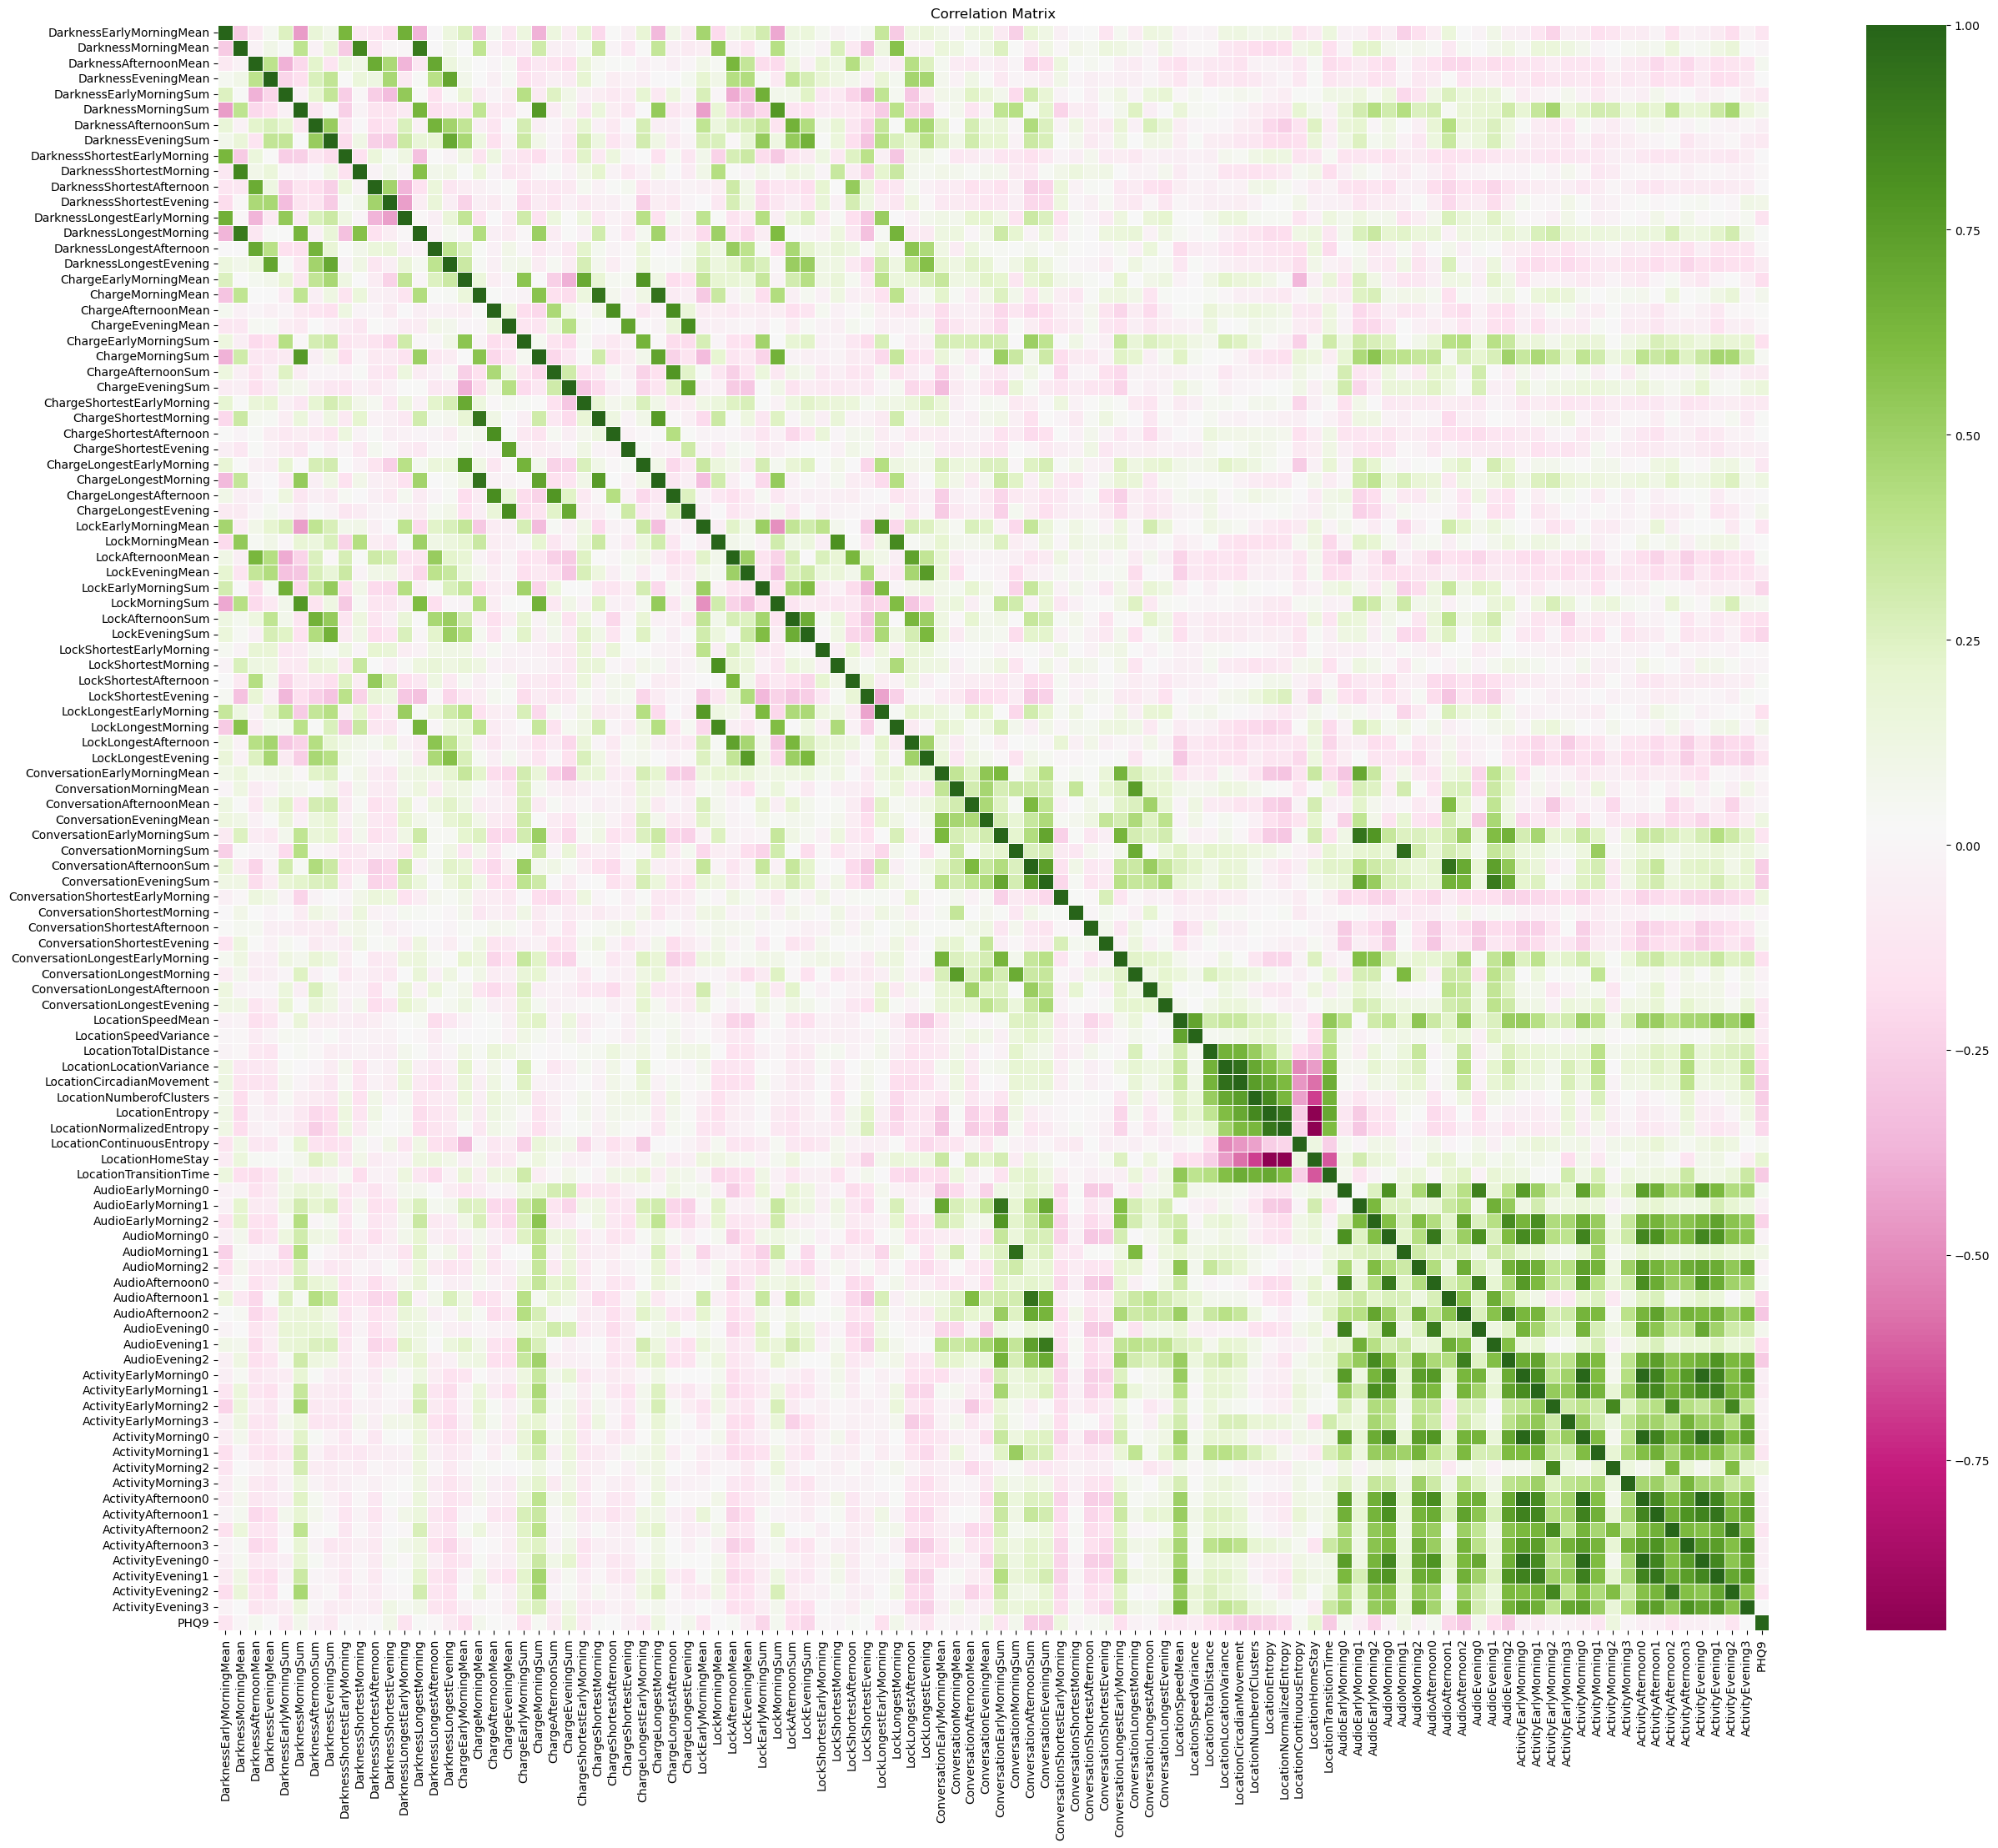

In [33]:
correlation_matrix = AllMergedPlot.corr()

# plt.figure(figsize=(12, 10))
plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, annot=False, cmap='PiYG', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')

plt.show()